# Import libraries

In [66]:
import os
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
%matplotlib inline

/Users/tejasrikurapati/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# Importing data

In [108]:
reddit = pd.DataFrame(reddit)
reddit['data'] = reddit
reddit
reddit = reddit.drop([0],axis=1)

/Users/tejasrikurapati/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [113]:
reddit

/Users/tejasrikurapati/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,data
0,This is Ali Larsen aka Gross Gore. One of the ...
1,"My Father, Filmmaker Rob Cohen is a Rapist and..."
2,Tara Reade on Rising // What we see here is a ...
3,"Asia Argento, Who Accused Weinstein, Made a De..."
4,DONT LET HER STORY BE SILENCED. We can not all...
...,...
369,"The Woman I Was\n\n\nLast week, my counselor r..."
370,I made a throwaway account just to say this. N...
371,Years ago I told my therapist that I went to a...
372,"Hey guys, I just wanted to let you know since ..."


In [130]:
reddit.to_csv('./reddit.csv')

/Users/tejasrikurapati/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [114]:
#converting dataset to list
corpus=[]
a=[]
for i in range(len(reddit['data'])):
        a=reddit['data'][i]
        corpus.append(a)
        
corpus[0:10]

/Users/tejasrikurapati/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['This is Ali Larsen aka Gross Gore. One of the many groomers and sexual harassers protected by Twitch.tv. Here to ask for help.',
 'My Father, Filmmaker Rob Cohen is a Rapist and Child Molester',
 'Tara Reade on Rising // What we see here is a systematic failure of the justice system to investigate and blatant corruption from Time is Up CW RAPE',
 'Asia Argento, Who Accused Weinstein, Made a Deal With Her Own Accuser',
 'DONT LET HER STORY BE SILENCED. We can not allow another rapist to lead this country.',
 'My husband insulted me without even realizing it',
 'Harvey Weinstein Sentenced to 23 Years in Prison on Rape Charges',
 '#Metoo',
 'Harvey Weinstein Is Found Guilty of Rape',
 'I finally cried about it. It’s been almost 3 months and I was reading a poetry book, came across this poem and broke down and cried about it for the first time.']

In [115]:
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "/var/folders/yd/dwdfnncj7g10ds7bnpksx5bc0000gn/T" will be used to save temporary dictionary and corpus.


/Users/tejasrikurapati/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# Data cleaning 

Converting upper case to lower case. Removing stop words.

In [116]:
list1 = ['f','k','r','ist','gmo','said','even','la','el','est','qu','gt','en','se','rt','via','en','l','que','n','un','las','es','con','por','para','et','al','el','si','a','q','w','e','r','t','y','i','o','p','s','g','h','j','k','l','z','x','c','v','b','n','m',':','/','(',')','?','|',";","]","[",".",'@',"&","-","!"]
stoplist = stopwords.words('english') + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'data.dict'))  # store the dictionary, for future reference

/Users/tejasrikurapati/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

2021-12-17 11:27:02,322 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-12-17 11:27:02,356 : INFO : built Dictionary(8435 unique tokens: ['aka', 'ali', 'ask', 'gore.', 'groomers']...) from 374 documents (total 29140 corpus positions)
2021-12-17 11:27:02,357 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(8435 unique tokens: ['aka', 'ali', 'ask', 'gore.', 'groomers']...) from 374 documents (total 29140 corpus positions)", 'datetime': '2021-12-17T11:27:02.357253', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'cr

In [118]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpus)  # store to disk, for later use

/Users/tejasrikurapati/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

2021-12-17 11:27:07,036 : INFO : storing corpus in Matrix Market format to /var/folders/yd/dwdfnncj7g10ds7bnpksx5bc0000gn/T/elon.mm
2021-12-17 11:27:07,037 : INFO : saving sparse matrix to /var/folders/yd/dwdfnncj7g10ds7bnpksx5bc0000gn/T/elon.mm
2021-12-17 11:27:07,038 : INFO : PROGRESS: saving document #0
2021-12-17 11:27:07,074 : INFO : saved 374x8435 matrix, density=0.731% (23048/3154690)
2021-12-17 11:27:07,076 : INFO : saving MmCorpus index to /var/folders/yd/dwdfnncj7g10ds7bnpksx5bc0000gn/T/elon.mm.index


# Implementing Co-occurrence matrix heatmap

In [119]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

/Users/tejasrikurapati/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

2021-12-17 11:27:21,901 : INFO : collecting document frequencies
2021-12-17 11:27:21,901 : INFO : PROGRESS: processing document #0
2021-12-17 11:27:21,925 : INFO : TfidfModel lifecycle event {'msg': 'calculated IDF weights for 374 documents and 8435 features (23048 matrix non-zeros)', 'datetime': '2021-12-17T11:27:21.925620', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'initialize'}


In [120]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

/Users/tejasrikurapati/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [121]:
total_topics = 5

/Users/tejasrikurapati/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [123]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

/Users/tejasrikurapati/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

2021-12-17 11:27:25,422 : INFO : using symmetric alpha at 0.2
2021-12-17 11:27:25,423 : INFO : using symmetric eta at 0.2
2021-12-17 11:27:25,425 : INFO : using serial LDA version on this node
2021-12-17 11:27:25,430 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 374 documents, updating model once every 374 documents, evaluating perplexity every 374 documents, iterating 50x with a convergence threshold of 0.001000
2021-12-17 11:27:25,431 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-12-17 11:27:25,

In [124]:
lda.show_topics(total_topics,10)

/Users/tejasrikurapati/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[(0,
  '0.006*"would" + 0.005*"told" + 0.005*"get" + 0.005*"like" + 0.005*"people" + 0.005*"could" + 0.005*"know" + 0.004*"one" + 0.004*"feel" + 0.004*"me."'),
 (1,
  '0.007*"would" + 0.007*"know" + 0.006*"want" + 0.006*"told" + 0.006*"me." + 0.005*"one" + 0.005*"really" + 0.005*"like" + 0.004*"get" + 0.004*"sexual"'),
 (2,
  '0.008*"would" + 0.006*"told" + 0.005*"i\'m" + 0.005*"like" + 0.004*"feel" + 0.004*"know" + 0.004*"years" + 0.003*"me." + 0.003*"get" + 0.003*"could"'),
 (3,
  '0.006*"would" + 0.005*"remember" + 0.004*"one" + 0.004*"me." + 0.004*"sexual" + 0.004*"like" + 0.004*"feel" + 0.004*"years" + 0.004*"told" + 0.004*"know"'),
 (4,
  '0.008*"like" + 0.006*"would" + 0.006*"know" + 0.005*"people" + 0.005*"told" + 0.004*"get" + 0.004*"years" + 0.004*"me." + 0.004*"could" + 0.004*"never"')]

In [125]:
data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}

/Users/tejasrikurapati/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [126]:
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(5, 39)


/Users/tejasrikurapati/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/Users/tejasrikurapati/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



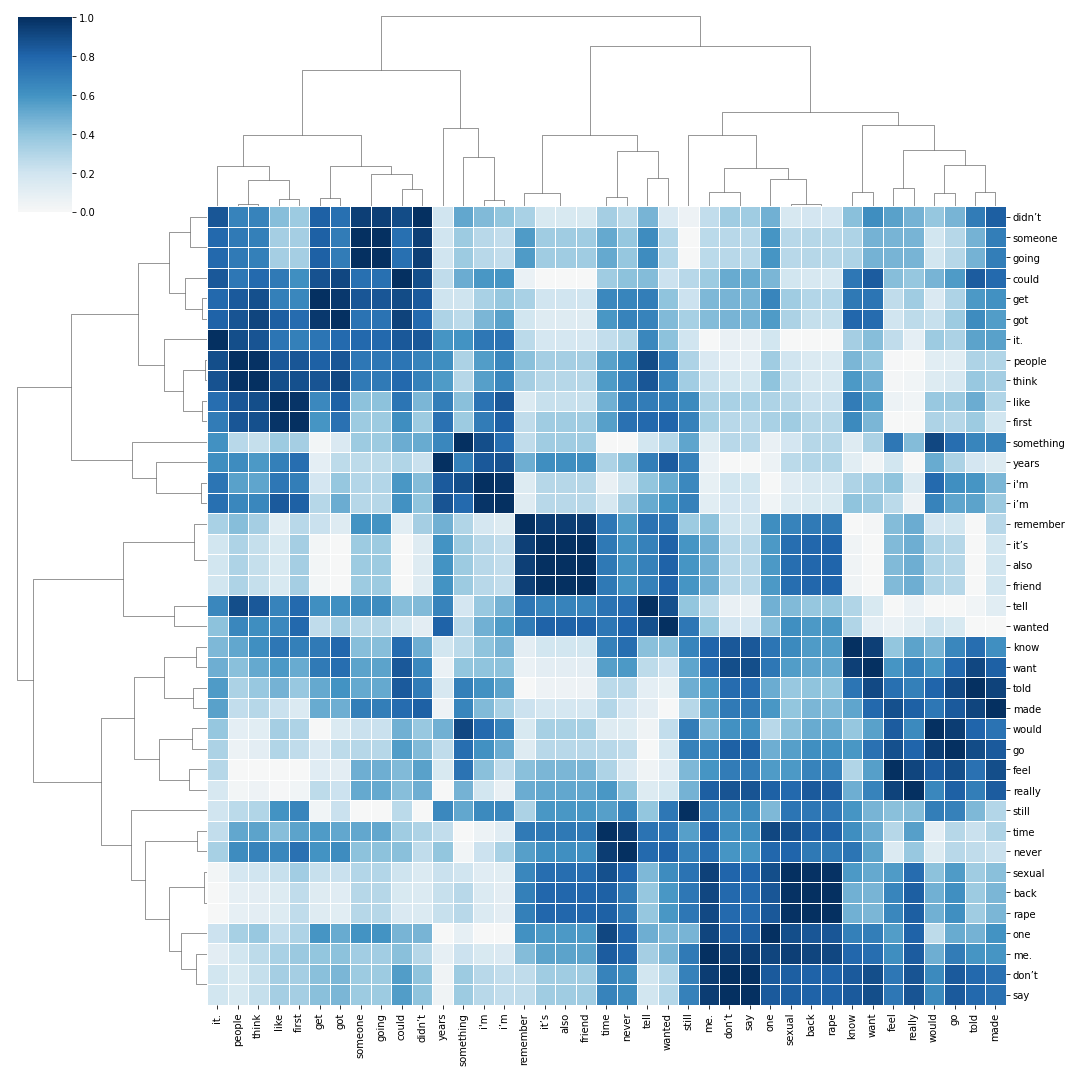

In [128]:
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(15, 15))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()